<a href="https://colab.research.google.com/github/claudio1975/100DataScienceProjects/blob/master/An%2520Experimental%2520Exploratory%2520Data%2520Analysis%2520Pipeline/An_Experimental_EDA_for_a_classification_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Experimental Exploratory Data Analysis for a classification task**

#### ***From Visualization to Statistical Analysis***

#### ***From Feature Engineering to Feature Selection***

#### ***From the Best Model Selection to Interpretability***



Exploratory Data Analysis is the first step in the Machine Learning Pipeline used to analyze data and it's between data cleaning and data modelling steps in the Data Science Pipeline. The reasons why you can use EDA are: understand patterns; detect mistakes; check assumptions; check relationships between variables of a dataset using visualization tools and statistical analysis. 



### ****Prepare Workspace****
To start the exploration set up the environment with libraries, upload the dataset (it's stored in a github repository) and split it into target variable and features variables. No more set up is required using Google Colab. Look at the guidelines: https://colab.research.google.com/notebooks/welcome.ipynb

In [1]:
# Upload libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statistics
from scipy.stats import chi2_contingency
from scipy.stats import kurtosis 
from scipy.stats import skew
from statistics import stdev 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.formula.api import ols
import itertools
!pip install eli5 
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


     |████████████████████████████████| 112kB 2.8MB/s 


Using TensorFlow backend.


In [0]:
# Upload dataset
url ='https://raw.githubusercontent.com/claudio1975/100DataScienceProjects/master/An%20Experimental%20Exploratory%20Data%20Analysis%20Pipeline/data/CAX_MortgageModeling_Train.csv'
df = pd.read_csv(url)

In [0]:
# Split dataset between target and features
X_full = df
y = X_full.RESULT
X_full.drop(['RESULT'], axis=1, inplace=True)


![](http://www.theleader.info/wp-content/uploads/2017/07/Mortgage-rates.jpg)

### ****Summarize Data**** 

The goal of this challenge, launched by CrowdAnalytix, is to develop a model to predict whether a mortgage will be funded or not based on certain factors in a customer’s application data. 
The evaluation metric used is the F1 score.
The data set is made up by 45.642 observations with predictor variables (21 features) and the target variable. It's a classification task with the goal to predict the 'Result' target variable for every row (Funded, Not Funded). Look at the competition: https://www.crowdanalytix.com/contests/propensity-to-fund-mortgages


In [4]:
# dimensions of dataset
print(X_full.shape)

(45642, 21)


In [5]:
# list types for each attribute
X_full.dtypes

Unique_ID             object
MORTGAGE NUMBER        int64
PROPERTY VALUE         int64
MORTGAGE PAYMENT       int64
GDS                  float64
LTV                  float64
TDS                  float64
AMORTIZATION           int64
MORTGAGE AMOUNT      float64
RATE                 float64
MORTGAGE PURPOSE      object
PAYMENT FREQUENCY     object
PROPERTY TYPE         object
TERM                   int64
FSA                   object
AGE RANGE             object
GENDER                object
INCOME                 int64
INCOME TYPE            int64
NAICS CODE            object
CREDIT SCORE           int64
dtype: object

In [6]:
# take a peek at the first rows of the data
X_full.head(5)

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,Refinance,Monthly,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,Refinance,Monthly,Single Detached,12,L9T,70 and over,Male,78000,2,56,710
2,CAX_Train_3,3,531000,2152,30.97,80.00,35.41,360,424800.0,3.5,Purchase,Monthly,Single Detached,6,M1N,35-39,Female,87000,2,72,709
3,CAX_Train_4,4,1200000,5410,19.04,75.00,34.14,360,960000.0,5.5,Purchase,Monthly,Single Detached,12,M2M,45-49,Male,300000,8,54,761
4,CAX_Train_5,5,350000,3342,29.59,80.00,34.85,360,592000.0,5.0,Refinance,Monthly,Single Detached,12,L7G,50-54,Male,147000,8,62,762


In [7]:
# summarize attribute distributions for data frame
print(X_full.describe().T)

                    count           mean  ...        75%         max
MORTGAGE NUMBER   45642.0   22821.500000  ...   34231.75     45642.0
PROPERTY VALUE    45642.0  582611.038079  ...  685000.00  18000000.0
MORTGAGE PAYMENT  45642.0    2392.148043  ...    2866.00     46479.0
GDS               45642.0     213.803294  ...      35.87   6872300.0
LTV               45642.0      70.632932  ...      80.00        95.0
TDS               45642.0     412.566952  ...      42.17  13462562.5
AMORTIZATION      45642.0     355.309583  ...     360.00       480.0
MORTGAGE AMOUNT   45642.0  425570.446942  ...  512000.00   7500000.0
RATE              45642.0       4.651149  ...       5.00        10.0
TERM              45642.0      15.286578  ...      12.00        60.0
INCOME            45642.0  125109.307217  ...  145000.00   3860000.0
INCOME TYPE       45642.0       5.315017  ...       8.00        20.0
CREDIT SCORE      45642.0     662.662811  ...     736.00       899.0

[13 rows x 8 columns]


In [8]:
print(X_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 21 columns):
Unique_ID            45642 non-null object
MORTGAGE NUMBER      45642 non-null int64
PROPERTY VALUE       45642 non-null int64
MORTGAGE PAYMENT     45642 non-null int64
GDS                  45642 non-null float64
LTV                  45642 non-null float64
TDS                  45642 non-null float64
AMORTIZATION         45642 non-null int64
MORTGAGE AMOUNT      45642 non-null float64
RATE                 45642 non-null float64
MORTGAGE PURPOSE     45642 non-null object
PAYMENT FREQUENCY    45642 non-null object
PROPERTY TYPE        45642 non-null object
TERM                 45642 non-null int64
FSA                  45642 non-null object
AGE RANGE            45642 non-null object
GENDER               45642 non-null object
INCOME               45642 non-null int64
INCOME TYPE          45642 non-null int64
NAICS CODE           45642 non-null object
CREDIT SCORE         45642 non-nu

In [9]:
def rstr(X_full): return X_full.shape, X_full.apply(lambda x: [x.unique()])
print(rstr(X_full))

((45642, 21), Unique_ID            [[CAX_Train_1, CAX_Train_2, CAX_Train_3, CAX_T...
MORTGAGE NUMBER      [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
PROPERTY VALUE       [[900000, 386000, 531000, 1200000, 350000, 420...
MORTGAGE PAYMENT     [[5429, 2179, 2152, 5410, 3342, 5275, 4383, 30...
GDS                  [[61.98, 35.22, 30.97, 19.04, 29.59, 26.16, 32...
LTV                  [[65.0, 74.29, 80.0, 75.0, 69.05, 69.23, 55.17...
TDS                  [[71.63, 40.65, 35.41, 34.14, 34.85, 26.16, 33...
AMORTIZATION                 [[360, 240, 300, 420, 180, 60, 120, 480]]
MORTGAGE AMOUNT      [[1040000.0, 390000.0, 424800.0, 960000.0, 592...
RATE                 [[4.0, 4.5, 3.5, 5.5, 5.0, 4.75, 5.25, 6.25, 4...
MORTGAGE PURPOSE                               [[Refinance, Purchase]]
PAYMENT FREQUENCY    [[Monthly, Bi-Weekly Accelerated, Bi-Weekly, S...
PROPERTY TYPE        [[Single Detached, Townhouse Condominium, Semi...
TERM                                         [[12, 6, 24, 60, 3

### **Exploratory Data Analysis (EDA) Pipeline**

Explanatory variables are grouped into categorical variables and numerical variables and for each one I’ve done a graphical and non-graphical analysis.

#### ****Formatting features****
If necessary, it's a good practice to format data, after have taken a peek of it.  

In [10]:
# replaced both '-1' and 'Unknown' values with NA's
X_full[X_full== -1] = np.nan
X_full[X_full=="Unknown"] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
# Format data into float and object types
X_full['PROPERTY VALUE'] = X_full['PROPERTY VALUE'].astype(float)
X_full['MORTGAGE PAYMENT'] = X_full['MORTGAGE PAYMENT'].astype(float)
X_full['AMORTIZATION'] = X_full['AMORTIZATION'].astype(float)
X_full['TERM'] = X_full['TERM'].astype(float)
X_full['INCOME'] = X_full['INCOME'].astype(float)
X_full['INCOME TYPE'] = X_full['INCOME TYPE'].astype(object)
X_full['CREDIT SCORE'] = X_full['CREDIT SCORE'].astype(float)

In [0]:
# Rename some features for a practical use
X_full = X_full.rename(columns={"MORTGAGE PURPOSE":"MORTGAGE_PURPOSE","PAYMENT FREQUENCY":"PAYMENT_FREQUENCY","PROPERTY TYPE":"PROPERTY_TYPE","AGE RANGE":"AGE_RANGE","PROPERTY VALUE": "PROPERTY_VALUE",
                                "MORTGAGE PAYMENT": "MORTGAGE_PAYMENT", "MORTGAGE AMOUNT":"MORTGAGE_AMOUNT","INCOME TYPE":"INCOME_TYPE","CREDIT SCORE":"CREDIT_SCORE"})

#### ****Handling Missing Values****

Missing values on numeric features are marked by "-1", meanwhile for categorical features they are marked with "Unknown"; I have imputed at these values "NA". There are two categorical features with missing values lower than 40%. My approach: I’ve filled up missing values with the mode of each variable and for both of them I’ve created a boolean feature with 1 (true-missing value) or 0 (false-actual value). "[Pawel Grabinski](https://www.kdnuggets.com/2018/12/feature-engineering-explained.html)"

In [13]:
# check missing values both to numeric features and categorical features 
feat_missing = []

for f in X_full.columns:
    missings = X_full[f].isnull().sum()
    if missings > 0:
        feat_missing.append(f)
        missings_perc = missings/X_full.shape[0]
        
        # printing summary of missing values
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

# how many variables do present missing values?
print()
print('In total, there are {} variables with missing values'.format(len(feat_missing)))

Variable GENDER has 6418 records (14.06%) with missing values
Variable INCOME_TYPE has 123 records (0.27%) with missing values

In total, there are 2 variables with missing values


In [0]:
# attaching boolean feature for each variable with missing values
X_full['GENDER_'] = np.where(X_full['GENDER'].isnull(), 1, 0)
X_full['GENDER_'] = X_full['GENDER_'].astype('object')
X_full['INCOME_TYPE_'] = np.where(X_full['INCOME_TYPE'].isnull(), 1, 0)
X_full['INCOME_TYPE_'] = X_full['INCOME_TYPE_'].astype('object')


In [0]:
# imput missing values with median or mode depending of features class
X_full['GENDER'].fillna(X_full['GENDER'].mode()[0], inplace=True)
X_full['INCOME_TYPE'].fillna(X_full['INCOME_TYPE'].mode()[0], inplace=True)


In [16]:
# final check 
feat_missing = []

for f in X_full.columns:
    missings = X_full[f].isnull().sum()
    if missings > 0:
        feat_missing.append(f)
        missings_perc = missings/X_full.shape[0]
        
        # printing summary of missing values
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

# how many variables do present missing values?
print()
print('In total, there are {} variables with missing values'.format(len(feat_missing)))


In total, there are 0 variables with missing values


#### **Target Variable Analysis**

The target variable is grouped into two classes: "Funded" and "Not Funded". It's quite unbalanced.

In [17]:
# summarize the class distribution 
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)



col_0,count,frequency
RESULT,,
FUNDED,36023,0.789251
NOT FUNDED,9619,0.210749


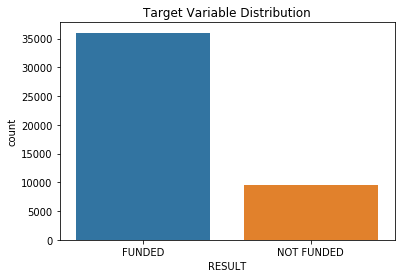

In [18]:
ax = sns.countplot(x=y, data=X_full, order=["FUNDED", "NOT FUNDED"]).set_title("Target Variable Distribution")


#### **Analysis for categorical features (barplot, univariate analysis, bivariate analysis)**

I've grouped all categorical features into a new subset: I've done a graphical analysis using barplots and I've counted the frequency for each class.
For a bivariate analysis I've used a Chi-Square Test to evaluate the relationship between the target variable and each categorical feature. This number tells how much difference exists between observed counts and the counts would be expect if there were no relationship at all in the population.

In [0]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() <= 15 and 
                    X_full[cname].dtype == "object"]

In [20]:
# Subset with categorical features
cat = X_full[categorical_cols]
cat.columns


Index(['MORTGAGE_PURPOSE', 'PAYMENT_FREQUENCY', 'PROPERTY_TYPE', 'AGE_RANGE',
       'GENDER', 'GENDER_', 'INCOME_TYPE_'],
      dtype='object')

In [21]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 7 columns):
MORTGAGE_PURPOSE     45642 non-null object
PAYMENT_FREQUENCY    45642 non-null object
PROPERTY_TYPE        45642 non-null object
AGE_RANGE            45642 non-null object
GENDER               45642 non-null object
GENDER_              45642 non-null object
INCOME_TYPE_         45642 non-null object
dtypes: object(7)
memory usage: 2.4+ MB


col_0             count  frequency
MORTGAGE_PURPOSE                  
Purchase          24419   0.535012
Refinance         21223   0.464988


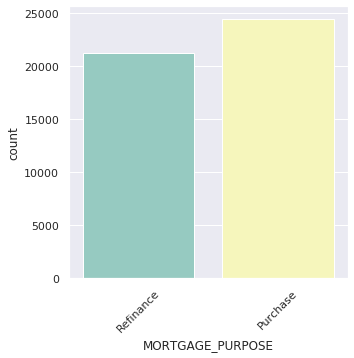

col_0                  count  frequency
PAYMENT_FREQUENCY                      
Bi-Weekly               1803   0.039503
Bi-Weekly Accelerated   1047   0.022939
Monthly                42785   0.937404
Semi-Monthly               4   0.000088
Weekly                     2   0.000044
Weekly Accelerated         1   0.000022


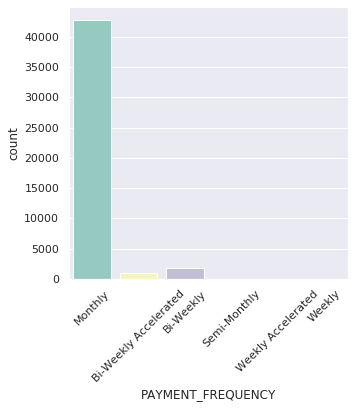

col_0                  count  frequency
PROPERTY_TYPE                          
Duplex                   469   0.010276
Fourplex                 118   0.002585
High Rise               5909   0.129464
Semi-Detached           4227   0.092612
Single Detached        29377   0.643640
Townhouse Condominium   2309   0.050589
Townhouse Freehold      3040   0.066605
Triplex                  193   0.004229


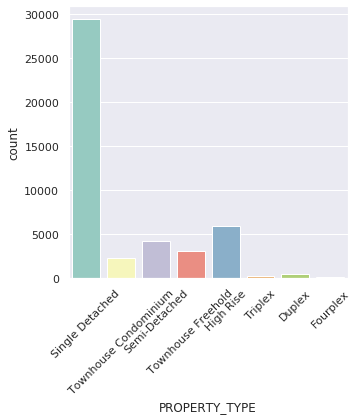

col_0        count  frequency
AGE_RANGE                    
25-29         2534   0.055519
30-34         4551   0.099711
35-39         5818   0.127470
40-44         6877   0.150673
45-49         7645   0.167499
50-54         6801   0.149007
55-59         4710   0.103194
60-64         2816   0.061698
65-69         1678   0.036764
70 and over   1374   0.030104
Under 25       838   0.018360


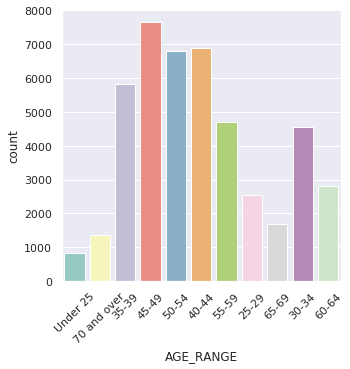

col_0   count  frequency
GENDER                  
Female  14375   0.314951
Male    31267   0.685049


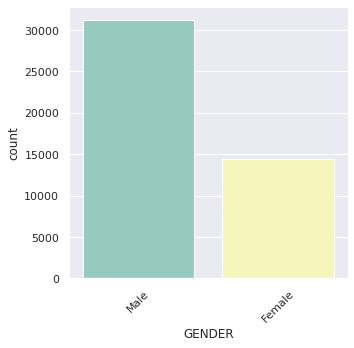

In [22]:
# Univariate analysis with frequency and barplots
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER']

for col in fcat:
    count = pd.crosstab(index = cat[col], columns="count")
    percentage = pd.crosstab(index = cat[col], columns="frequency")/pd.crosstab(index = cat[col], columns="frequency").sum()
    tab = pd.concat([count, percentage], axis=1)
    plt.figure()
    sns.countplot(x=cat[col], data=cat, palette="Set3")
    plt.xticks(rotation=45)
    print(tab)
    plt.show()
    

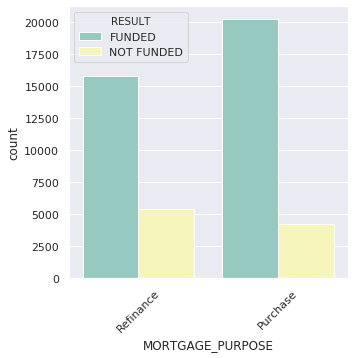

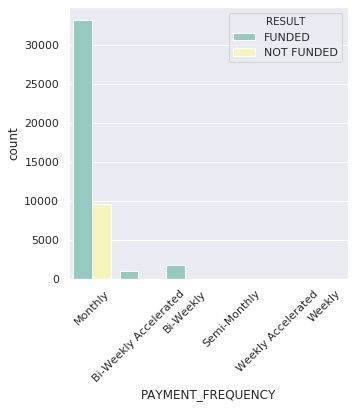

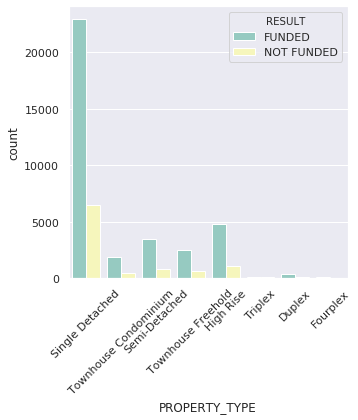

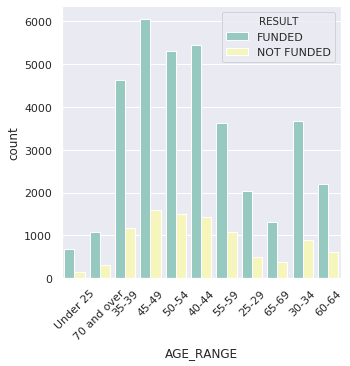

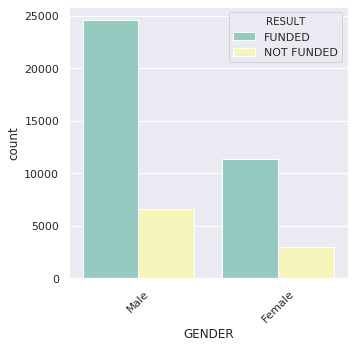

In [23]:
# Bivariate analysis with barplots
sns.set( rc = {'figure.figsize': (5, 5)})
fcat = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER']

for col in fcat:
    plt.figure()
    sns.countplot(x=cat[col], hue=y, data=cat, palette="Set3")
    plt.xticks(rotation=45)
    plt.show()

#### ****Feature Selection****

The Chi-Square Test is used as feature selection testing the null hypothesis of independence between target variable and categorical features. The goal is to test that two classifications are independent or not. Two classifications are independent if the distribution of one, with respect to a classification principle, is not influenced by the other one. If the null hypothesis is not rejected the two classifications are independent (P-Value>0.05) and the feature can be dropped.

In [0]:
# Joined target variable with categorical features in a new dataframe for a Chi-Square Test
cat2 = pd.concat([y,cat], axis=1)

In [0]:
# Chi-Square function
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [26]:
# Initialize Chi-Square Class
cT = ChiSquare(cat2)

# Feature Selection
testColumns = ['MORTGAGE_PURPOSE','PAYMENT_FREQUENCY','PROPERTY_TYPE','AGE_RANGE','GENDER','GENDER_','INCOME_TYPE_']
for var in testColumns:
    cT.TestIndependence(colX=var,colY='RESULT')  

MORTGAGE_PURPOSE is IMPORTANT for Prediction
PAYMENT_FREQUENCY is IMPORTANT for Prediction
PROPERTY_TYPE is IMPORTANT for Prediction
AGE_RANGE is IMPORTANT for Prediction
GENDER is NOT an important predictor. (Discard GENDER from model)
GENDER_ is IMPORTANT for Prediction
INCOME_TYPE_ is NOT an important predictor. (Discard INCOME_TYPE_ from model)


In [27]:
# Drop feature not helpful by Feature Selection
cat = cat.drop(['GENDER', 'INCOME_TYPE_'], axis=1)
cat.shape

(45642, 5)

#### ****Feature Engineering on Categorical Features: One-hot encoding****

I've transformed categorical features into numerical variables with one-hot encoding methodology to afford a better understanding of variables by machine learning models.

In [0]:
# One-hot encode the data (to shorten the code, I use pandas)
HOcat = pd.get_dummies(cat)
HOcat = HOcat.astype(int)


In [29]:
# Look at the new subset
HOcat.shape

(45642, 29)

In [30]:
HOcat.head()

,MORTGAGE_PURPOSE_Purchase,MORTGAGE_PURPOSE_Refinance,PAYMENT_FREQUENCY_Bi-Weekly,PAYMENT_FREQUENCY_Bi-Weekly Accelerated,PAYMENT_FREQUENCY_Monthly,PAYMENT_FREQUENCY_Semi-Monthly,PAYMENT_FREQUENCY_Weekly,PAYMENT_FREQUENCY_Weekly Accelerated,PROPERTY_TYPE_Duplex,PROPERTY_TYPE_Fourplex,PROPERTY_TYPE_High Rise,PROPERTY_TYPE_Semi-Detached,PROPERTY_TYPE_Single Detached,PROPERTY_TYPE_Townhouse Condominium,PROPERTY_TYPE_Townhouse Freehold,PROPERTY_TYPE_Triplex,AGE_RANGE_25-29,AGE_RANGE_30-34,AGE_RANGE_35-39,AGE_RANGE_40-44,AGE_RANGE_45-49,AGE_RANGE_50-54,AGE_RANGE_55-59,AGE_RANGE_60-64,AGE_RANGE_65-69,AGE_RANGE_70 and over,AGE_RANGE_Under 25,GENDER__0,GENDER__1
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


#### **Analysis for numerical features (distribution, univariate analysis, bivariate analysis)**

I've grouped all numerical features into a new subset: I've done a graphical analysis using histograms, density plots, jitter plots and boxplots; also I've performed metrics such as standard deviation, skewness and kurtosis for each variable.  For a bivariate analysis I've used a the Anova Test to evaluate the relationship between the target variable and each numerical feature. This test assesses whether the average of more than two groups are statistically different. To finish this analysis I've had a look about a correlation between numerical features.

In [0]:
# Select numerical columns
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['float64']]



In [32]:
# Subset with numerical features
num = X_full[numerical_cols]
num.columns

Index(['PROPERTY_VALUE', 'MORTGAGE_PAYMENT', 'GDS', 'LTV', 'TDS',
       'AMORTIZATION', 'MORTGAGE_AMOUNT', 'RATE', 'TERM', 'INCOME',
       'INCOME_TYPE', 'CREDIT_SCORE'],
      dtype='object')

In [33]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 12 columns):
PROPERTY_VALUE      45642 non-null float64
MORTGAGE_PAYMENT    45642 non-null float64
GDS                 45642 non-null float64
LTV                 45642 non-null float64
TDS                 45642 non-null float64
AMORTIZATION        45642 non-null float64
MORTGAGE_AMOUNT     45642 non-null float64
RATE                45642 non-null float64
TERM                45642 non-null float64
INCOME              45642 non-null float64
INCOME_TYPE         45642 non-null float64
CREDIT_SCORE        45642 non-null float64
dtypes: float64(12)
memory usage: 4.2 MB


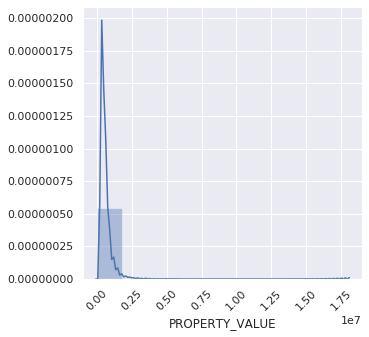

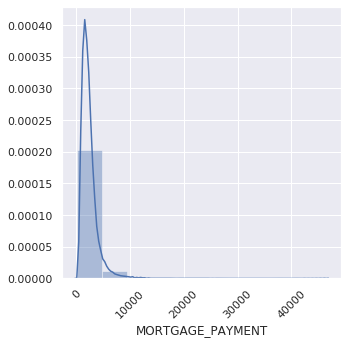

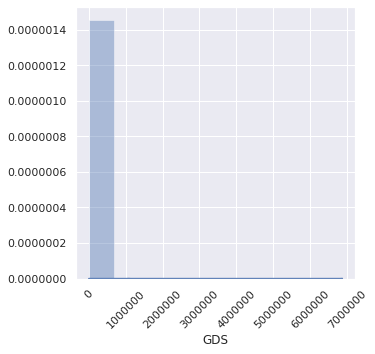

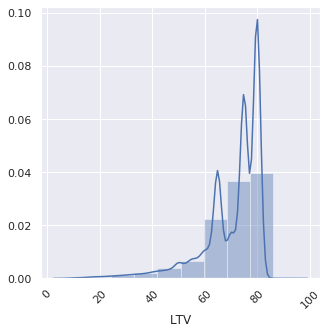

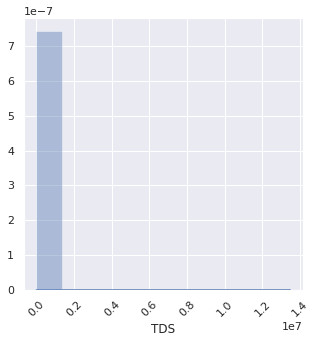

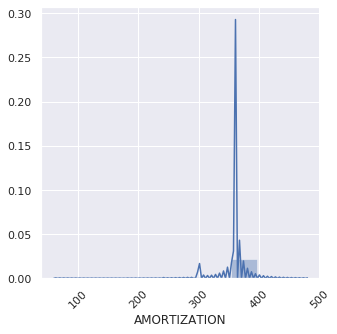

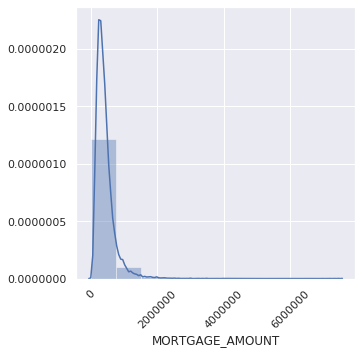

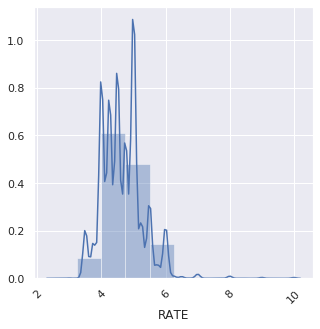

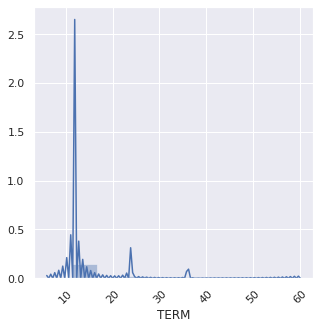

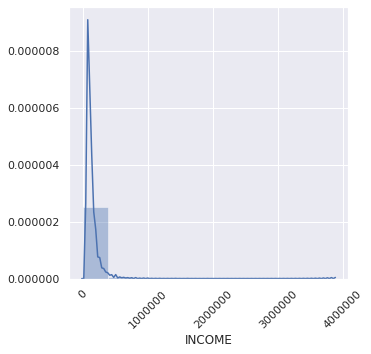

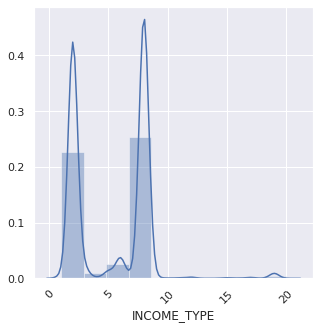

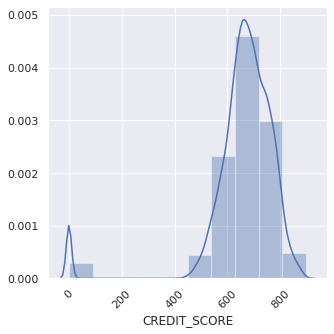

In [34]:
# Univariate analysis with density plots and histograms
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['PROPERTY_VALUE', 'MORTGAGE_PAYMENT','GDS', 'LTV', 'TDS', 'AMORTIZATION','MORTGAGE_AMOUNT', 'RATE', 'TERM', 'INCOME', 'INCOME_TYPE', 'CREDIT_SCORE']

for col in fnum:
    plt.figure()
    x=num[col]
    sns.distplot(x, bins=10)
    plt.xticks(rotation=45)
    plt.show()        

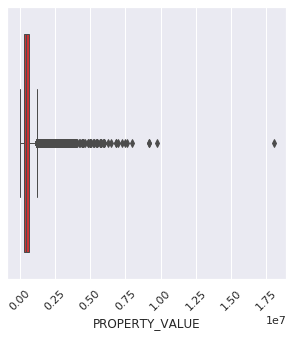

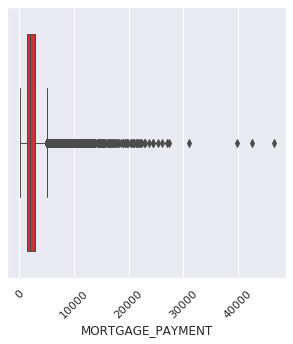

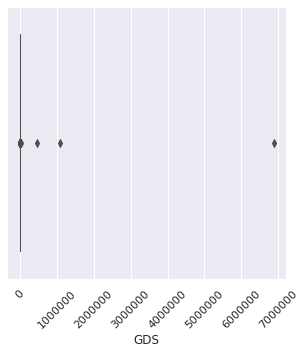

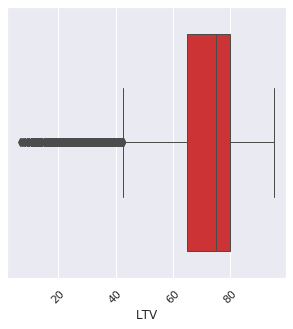

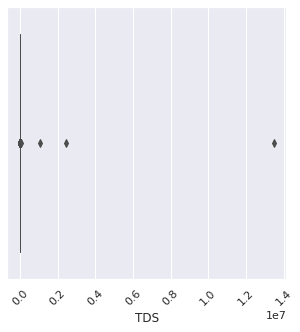

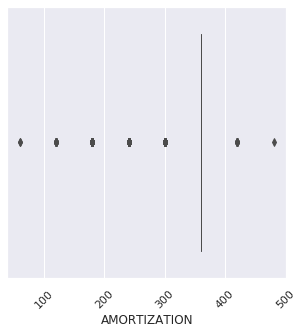

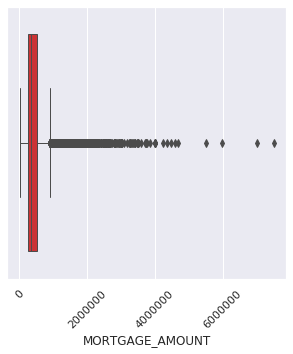

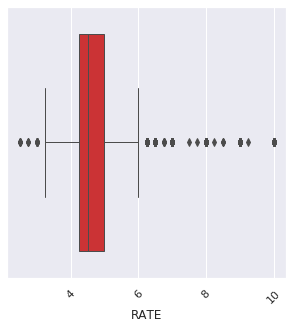

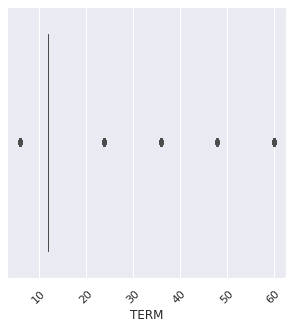

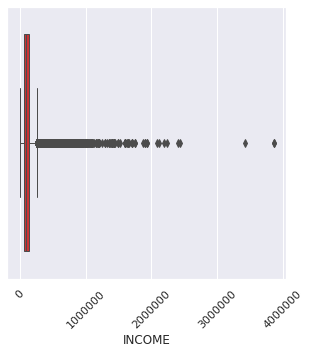

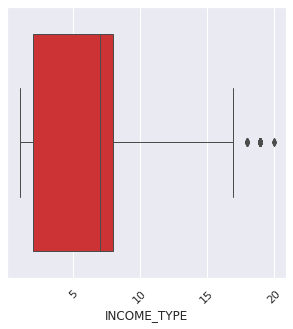

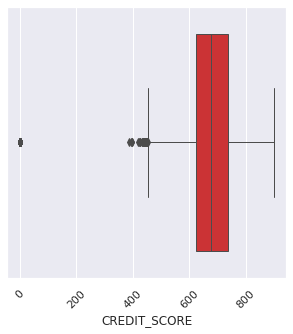

In [35]:
# Univariate analysis with box-plots
for col in fnum:
    plt.figure()
    x=num[col]
    sns.boxplot(x,palette="Set1",linewidth=1)
    plt.xticks(rotation=45)
    plt.show()

In [36]:
# Univariate analysis looking at Standard Deviation, Skewness and Kurtosis
for col in fnum:
  print(col,'\nStandard Deviation :', stdev(num[col]), 
        '\nSkewness :', skew(num[col]), 
        '\nKurtosis :', kurtosis(num[col]))
  


PROPERTY_VALUE 
Standard Deviation : 438208.2085427996 
Skewness : 5.644266384349458 
Kurtosis : 93.72909347332983
MORTGAGE_PAYMENT 
Standard Deviation : 1688.2087213532793 
Skewness : 4.402400077337014 
Kurtosis : 47.45818870386354
GDS 
Standard Deviation : 32637.66446592655 
Skewness : 205.39129293990604 
Kurtosis : 43090.063976937345
LTV 
Standard Deviation : 11.566443844367008 
Skewness : -1.871170163173591 
Kurtosis : 4.149196542952344
TDS 
Standard Deviation : 64258.59487835621 
Skewness : 202.799209574294 
Kurtosis : 42253.121451125626
AMORTIZATION 
Standard Deviation : 18.011798136682657 
Skewness : -4.6857601326562355 
Kurtosis : 31.39960985033308
MORTGAGE_AMOUNT 
Standard Deviation : 302046.8769420545 
Skewness : 3.8603597794173012 
Kurtosis : 35.0376970193198
RATE 
Standard Deviation : 0.6423709503915852 
Skewness : 1.1712117465210128 
Kurtosis : 5.2781194112118435
TERM 
Standard Deviation : 7.443856684506333 
Skewness : 2.505016893759331 
Kurtosis : 7.286565126841463
INCOME

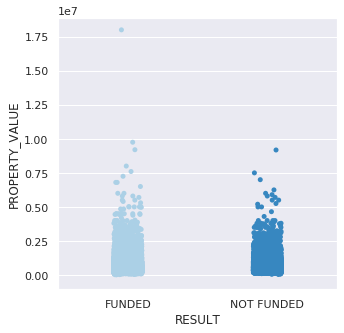

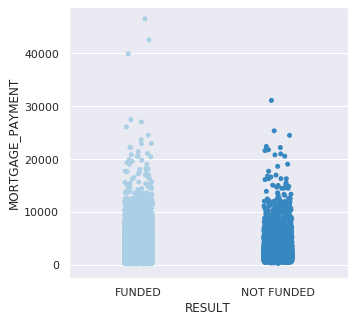

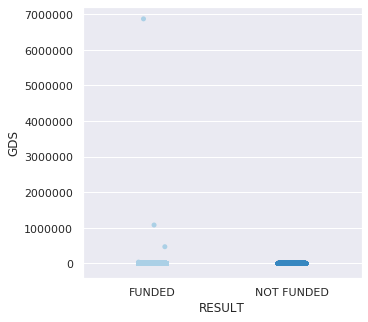

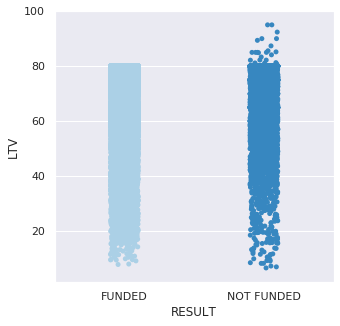

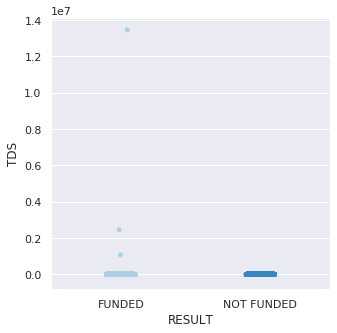

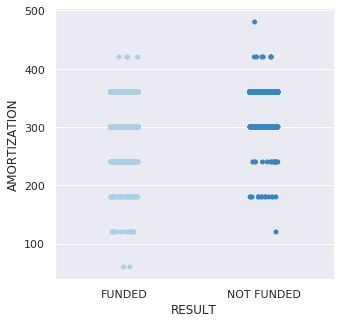

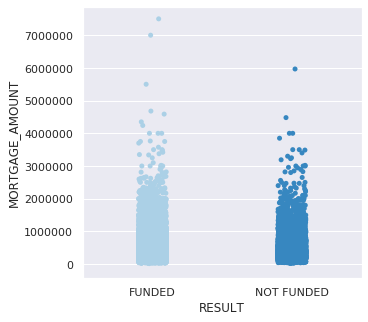

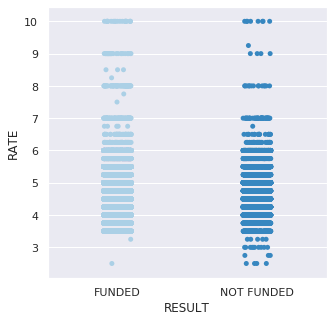

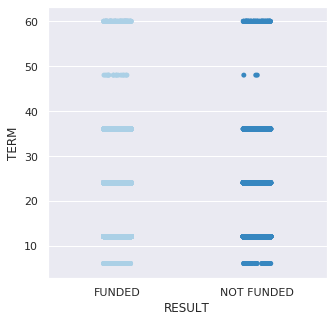

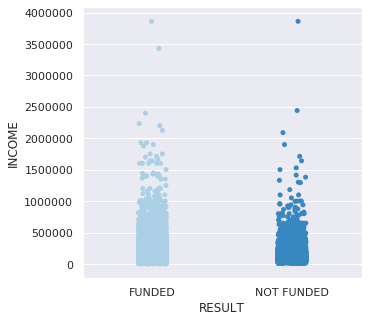

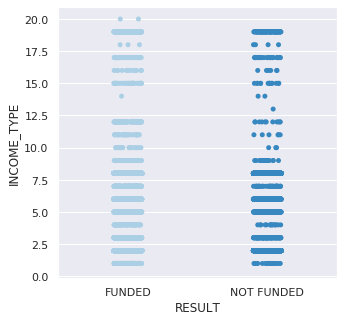

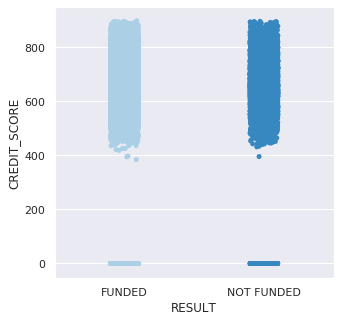

In [37]:
# Bivariate analysis with jitter-plots
for col in fnum:
    plt.figure()
    sns.stripplot(y=col, x=y, data=num, jitter=True, palette="Blues")
    plt.show()

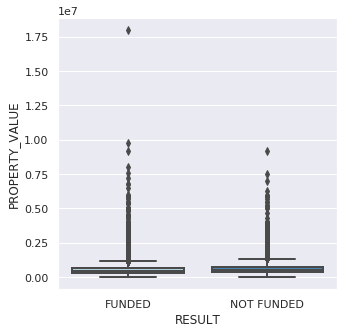

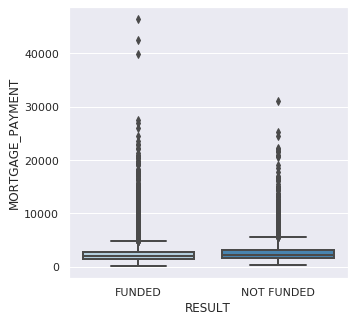

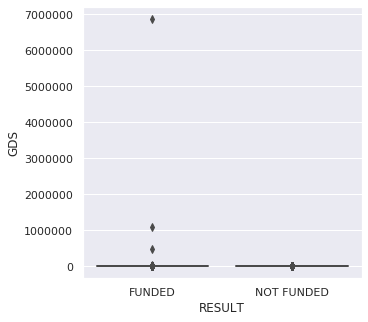

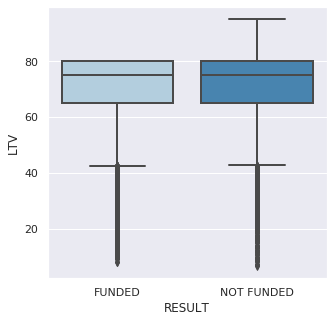

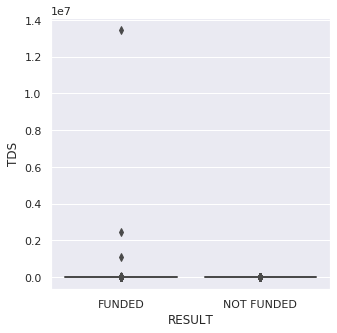

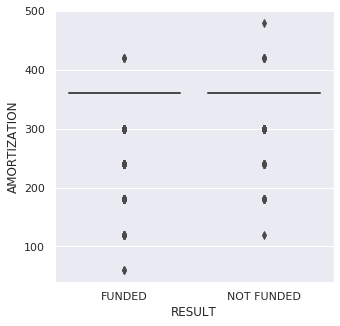

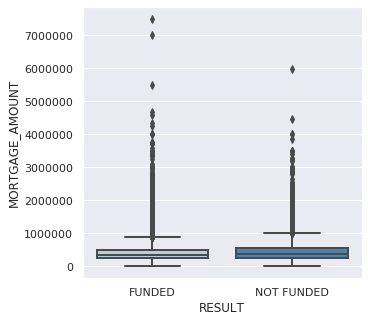

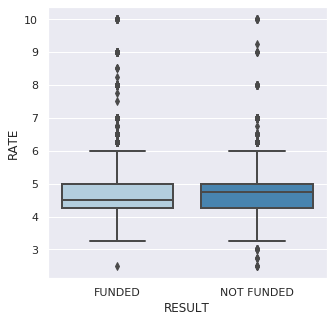

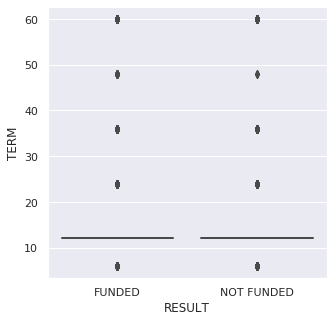

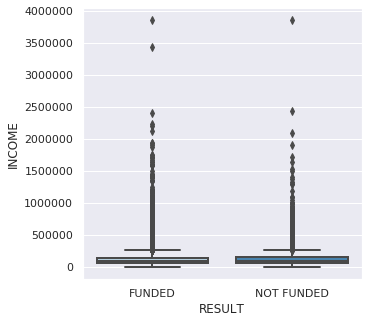

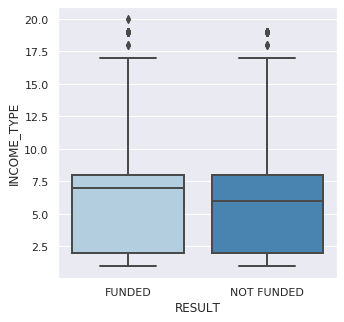

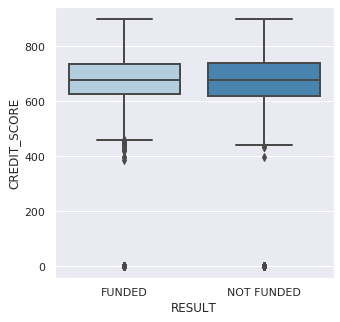

In [38]:
# Bivariate analysis with box-plots
for col in fnum:
    plt.figure()
    sns.boxplot(y=col, x=y, data=num, linewidth=2, palette="Blues")
    plt.show()

#### ****Feature selection****
Bivariate analysis with Anova test can be used as feature selection testing the null hypothesis of independence between target variable and numerical features. The goal is to test that two groups are independent or not. The goal of this methodology is to check if the averages of two or more groups are significantly different from each other. It's based on the ratio between variances of groups. If the null hypothesis is not rejected the two groups are independent (P-Value>0.05) and the feature can be dropped.

In [0]:
# Anova Test 
num2 = pd.concat([y,num], axis=1)
num2['RESULT'] = np.where(num2['RESULT']=='FUNDED',1,0)

In [40]:
results = ols('RESULT ~ PROPERTY_VALUE+MORTGAGE_PAYMENT+GDS+LTV+TDS+AMORTIZATION+MORTGAGE_AMOUNT+RATE+TERM+INCOME+INCOME_TYPE+CREDIT_SCORE', data=num2).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
PROPERTY_VALUE,0.556625,1.0,3.412226,6.472157e-02
MORTGAGE_PAYMENT,10.966403,1.0,67.226313,2.483058e-16
GDS,0.000239,1.0,0.001466,9.694578e-01
LTV,21.345510,1.0,130.852378,2.933207e-30
TDS,0.005464,1.0,0.033494,8.547877e-01
AMORTIZATION,0.076748,1.0,0.470482,4.927690e-01
MORTGAGE_AMOUNT,0.016041,1.0,0.098332,7.538419e-01
RATE,31.734652,1.0,194.539962,4.000693e-44
TERM,0.790803,1.0,4.847784,2.768665e-02
INCOME,5.646870,1.0,34.616479,4.042878e-09


Another feature selection approach is to observe correlation between variables, in this step only between numerical features. There are some models such as linear regression where related features can deteriorate the performance (multicollinearity). Though some ensemble models are not sensitive at this topic, [“Ensembles of tree-based models”](https://medium.com/data-design/ensembles-of-tree-based-models-why-correlated-features-do-not-trip-them-and-why-na-matters-7658f4752e1b), I prefer to remove them anyway because I don't know which model to use in advance.

In [41]:
# Correlation matrix
corr_matrix = num.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,TERM,INCOME,INCOME_TYPE,CREDIT_SCORE
PROPERTY_VALUE,1,0.88,0.012,-0.073,0.012,0.1,0.89,-0.056,-0.065,0.49,0.16,0.1
MORTGAGE_PAYMENT,0.88,1,0.008,0.13,0.0077,0.11,0.96,-0.017,-0.074,0.54,0.17,0.099
GDS,0.012,0.008,1,-0.011,0.99,0.0015,0.0058,0.0036,-0.0025,-0.0055,0.0018,0.00098
LTV,-0.073,0.13,-0.011,1,-0.011,0.16,0.16,-0.21,-0.022,0.13,-0.0079,0.15
TDS,0.012,0.0077,0.99,-0.011,1,0.0015,0.0055,0.0045,-0.0026,-0.005,0.0019,0.0016
AMORTIZATION,0.1,0.11,0.0015,0.16,0.0015,1,0.14,-0.15,-0.036,0.055,0.029,0.071
MORTGAGE_AMOUNT,0.89,0.96,0.0058,0.16,0.0055,0.14,1,-0.11,-0.068,0.55,0.18,0.13
RATE,-0.056,-0.017,0.0036,-0.21,0.0045,-0.15,-0.11,1,-0.0058,-0.015,-0.058,-0.27
TERM,-0.065,-0.074,-0.0025,-0.022,-0.0026,-0.036,-0.068,-0.0058,1,-0.047,0.013,-0.01
INCOME,0.49,0.54,-0.0055,0.13,-0.005,0.055,0.55,-0.015,-0.047,1,0.22,0.092


In [42]:
# Select correlated features and removed it
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.75)]
to_drop

['MORTGAGE_PAYMENT', 'TDS', 'MORTGAGE_AMOUNT']

In [0]:
# Drop features 
num = num.drop(num[to_drop], axis=1)

In [44]:
# Look at the new subset
num.shape

(45642, 9)

In [45]:
num.head()

,PROPERTY_VALUE,GDS,LTV,AMORTIZATION,RATE,TERM,INCOME,INCOME_TYPE,CREDIT_SCORE
0,900000.0,61.98,65.00,360.0,4.0,12.0,108000.0,8.0,681.0
1,386000.0,35.22,74.29,360.0,4.5,12.0,78000.0,2.0,710.0
2,531000.0,30.97,80.00,360.0,3.5,6.0,87000.0,2.0,709.0
3,1200000.0,19.04,75.00,360.0,5.5,12.0,300000.0,8.0,761.0
4,350000.0,29.59,80.00,360.0,5.0,12.0,147000.0,8.0,762.0


#### ****Handling Outliers****
Outliers are those observations that lie outside 1.5 times the Inter Quartile Range (difference between 75th and 25th quartiles). If they are not detected and corrected in an appropriate way they can distort the prediction. There are several ways to handle outliers, I've decided to cap them replacing those observations outside the lower limit with the value of the 5th quartile and those that lie above the upper limit, with the value of the 95th quartile. 

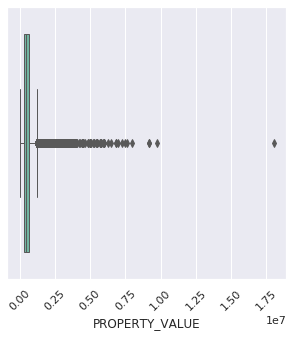

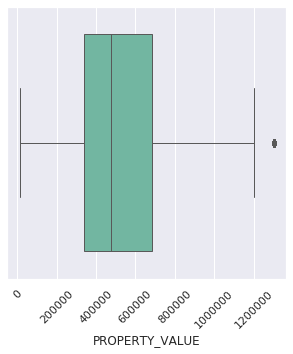

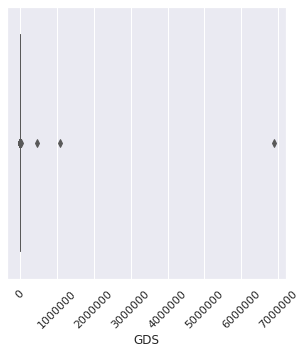

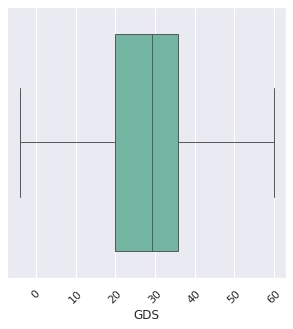

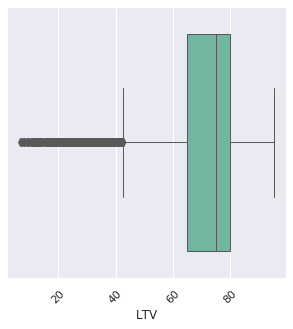

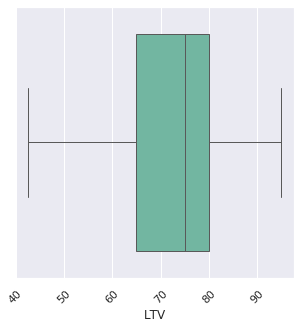

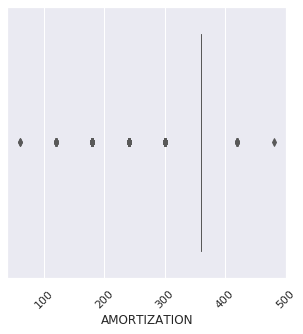

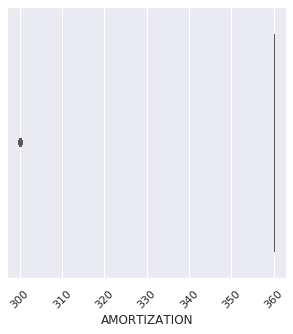

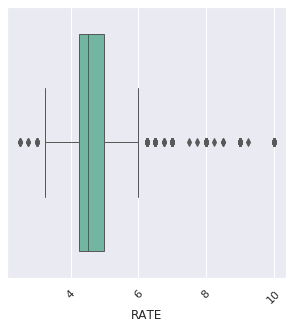

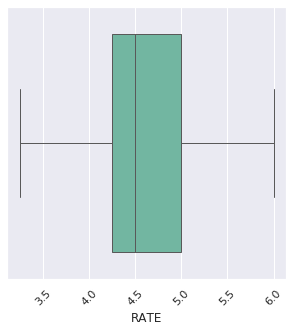

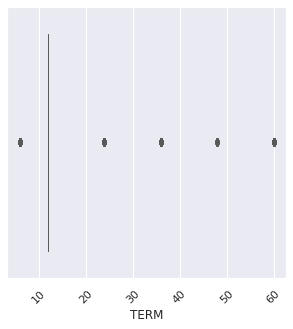

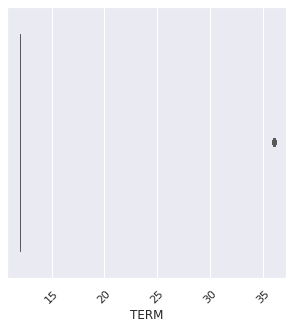

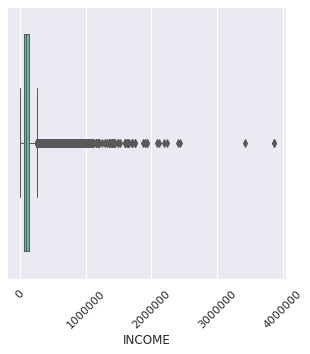

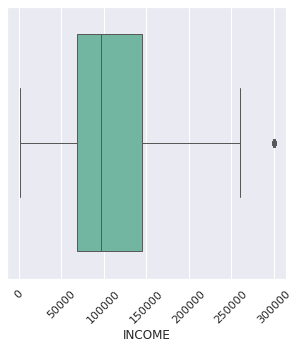

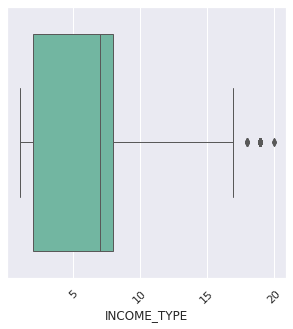

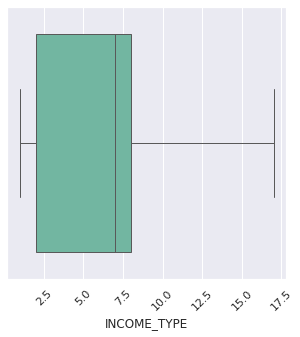

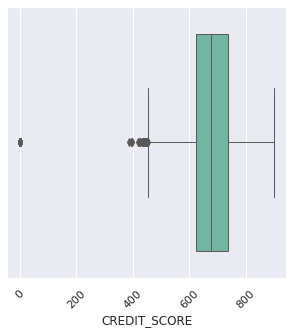

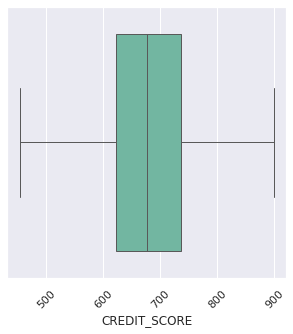

In [46]:
# Outliers

# PROPERTY_VALUE
#before
plt.figure()
x=num['PROPERTY_VALUE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'PROPERTY_VALUE'
q75, q25 = np.percentile(num.PROPERTY_VALUE.dropna(), [75 ,25])
q95, q05 = np.percentile(num.PROPERTY_VALUE.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['PROPERTY_VALUE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# GDS
#before
plt.figure()
x=num['GDS']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'GDS'
q75, q25 = np.percentile(num.GDS.dropna(), [75 ,25])
q95, q05 = np.percentile(num.GDS.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['GDS']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# LTV
#before
plt.figure()
x=num['LTV']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'LTV'
q75, q25 = np.percentile(num.LTV.dropna(), [75 ,25])
q95, q05 = np.percentile(num.LTV.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['LTV']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# AMORTIZATION
#before
plt.figure()
x=num['AMORTIZATION']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'AMORTIZATION'
q75, q25 = np.percentile(num.AMORTIZATION.dropna(), [75 ,25])
q95, q05 = np.percentile(num.AMORTIZATION.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['AMORTIZATION']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# RATE
#before
plt.figure()
x=num['RATE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'RATE'
q75, q25 = np.percentile(num.RATE.dropna(), [75 ,25])
q95, q05 = np.percentile(num.RATE.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['RATE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# TERM
#before
plt.figure()
x=num['TERM']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'TERM'
q75, q25 = np.percentile(num.TERM.dropna(), [75 ,25])
q95, q05 = np.percentile(num.TERM.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['TERM']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# INCOME
#before
plt.figure()
x=num['INCOME']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'INCOME'
q75, q25 = np.percentile(num.INCOME.dropna(), [75 ,25])
q95, q05 = np.percentile(num.INCOME.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['INCOME']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# INCOME_TYPE
#before
plt.figure()
x=num['INCOME_TYPE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'INCOME_TYPE'
q75, q25 = np.percentile(num.INCOME_TYPE.dropna(), [75 ,25])
q95, q05 = np.percentile(num.INCOME_TYPE.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['INCOME_TYPE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()


# CREDIT_SCORE
#before
plt.figure()
x=num['CREDIT_SCORE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()

#corrections
i = 'CREDIT_SCORE'
q75, q25 = np.percentile(num.CREDIT_SCORE.dropna(), [75 ,25])
q95, q05 = np.percentile(num.CREDIT_SCORE.dropna(), [95 ,5])
iqr = q75 - q25 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5) 
num[i].loc[num[i] < min] = q05
num[i].loc[num[i] > max] = q95

#after
plt.figure()
x=num['CREDIT_SCORE']
sns.boxplot(x,palette="Set2",linewidth=1)
plt.xticks(rotation=45)
plt.show()



In [0]:
# Grasp all
X_all = pd.concat([HOcat, num], axis=1, join='inner')

In [48]:
# Look at the new dataset
X_all.head()

,MORTGAGE_PURPOSE_Purchase,MORTGAGE_PURPOSE_Refinance,PAYMENT_FREQUENCY_Bi-Weekly,PAYMENT_FREQUENCY_Bi-Weekly Accelerated,PAYMENT_FREQUENCY_Monthly,PAYMENT_FREQUENCY_Semi-Monthly,PAYMENT_FREQUENCY_Weekly,PAYMENT_FREQUENCY_Weekly Accelerated,PROPERTY_TYPE_Duplex,PROPERTY_TYPE_Fourplex,PROPERTY_TYPE_High Rise,PROPERTY_TYPE_Semi-Detached,PROPERTY_TYPE_Single Detached,PROPERTY_TYPE_Townhouse Condominium,PROPERTY_TYPE_Townhouse Freehold,PROPERTY_TYPE_Triplex,AGE_RANGE_25-29,AGE_RANGE_30-34,AGE_RANGE_35-39,AGE_RANGE_40-44,AGE_RANGE_45-49,AGE_RANGE_50-54,AGE_RANGE_55-59,AGE_RANGE_60-64,AGE_RANGE_65-69,AGE_RANGE_70 and over,AGE_RANGE_Under 25,GENDER__0,GENDER__1,PROPERTY_VALUE,GDS,LTV,AMORTIZATION,RATE,TERM,INCOME,INCOME_TYPE,CREDIT_SCORE
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,900000.0,44.89,65.00,360.0,4.0,12.0,108000.0,8.0,681.0
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,386000.0,35.22,74.29,360.0,4.5,12.0,78000.0,2.0,710.0
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,531000.0,30.97,80.00,360.0,3.5,12.0,87000.0,2.0,709.0
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1200000.0,19.04,75.00,360.0,5.5,12.0,300000.0,8.0,761.0
4,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,350000.0,29.59,80.00,360.0,5.0,12.0,147000.0,8.0,762.0


In [49]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 38 columns):
MORTGAGE_PURPOSE_Purchase                  45642 non-null int64
MORTGAGE_PURPOSE_Refinance                 45642 non-null int64
PAYMENT_FREQUENCY_Bi-Weekly                45642 non-null int64
PAYMENT_FREQUENCY_Bi-Weekly Accelerated    45642 non-null int64
PAYMENT_FREQUENCY_Monthly                  45642 non-null int64
PAYMENT_FREQUENCY_Semi-Monthly             45642 non-null int64
PAYMENT_FREQUENCY_Weekly                   45642 non-null int64
PAYMENT_FREQUENCY_Weekly Accelerated       45642 non-null int64
PROPERTY_TYPE_Duplex                       45642 non-null int64
PROPERTY_TYPE_Fourplex                     45642 non-null int64
PROPERTY_TYPE_High Rise                    45642 non-null int64
PROPERTY_TYPE_Semi-Detached                45642 non-null int64
PROPERTY_TYPE_Single Detached              45642 non-null int64
PROPERTY_TYPE_Townhouse Condominium        45642 non-null i

In [50]:
X_all.shape

(45642, 38)

I've extended the traditional data exploration looking at the behaviour of several baseline models and which features can be relevant for the prediction. I've split this exploration in two parts: without handling the unbalanced target variable (baseline models and scaled baseline models) and handling it (baseline models and scaled baseline models).  

### **Modeling Part I: without handling unbalanced target variable**

### ****Pre-Processing: split data set****
To analyze the performance of a model is a good manner to split the data set into the training set and the test set. I've decided to split it into three parts: training set, validation set and test set for a better understanding of models. 

In [0]:
# Break off validation and test set from training data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2,
                                                                random_state=0)


#### ****Confusion Matrix****
The confusion matrix is a summary table representation of prediction results for a classification problem. Each row of the matrix corresponds at the instances in a predicted class, instead each column of the matrix corresponds at the instances in an actual class. 
This table reports the number of false positives (for incorrectly predicted event values), false negatives (for incorrectly predicted no-event values), true positives (for correctly predicted event values) and true negatives (for correctly predicted no-event values). It affords a better understanding of the classification prediction results than the single overall metrics. The goal is to maximize performance both from precision and recall with high values. Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. Recall is a ratio of the number of true positives divided by the sum of the true positives and the false negatives. 

In [0]:
# Confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.tab20b):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),color="white")
                 

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### ****Baseline Models****
The analysis starts with six baseline models: logistic regression as the easiest model, as a benchmark and then five ensemble models (bagging, random forest, adaboost, gradient boosting machine and extreme gradient boosting).

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Confusion matrix, without normalization
[[7240    0]
 [1889    0]]
Confusion matrix, without normalization
[[6883  357]
 [1708  181]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Confusion matrix, without normalization
[[6972  268]
 [1738  151]]
Confusion matrix, without normalization
[[7199   41]
 [1833   56]]
Confusion matrix, without normalization
[[7211   29]
 [1844   45]]
Confusion matrix, without normalization
[[7219   21]
 [1860   29]]


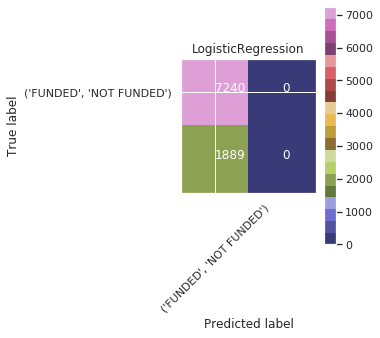

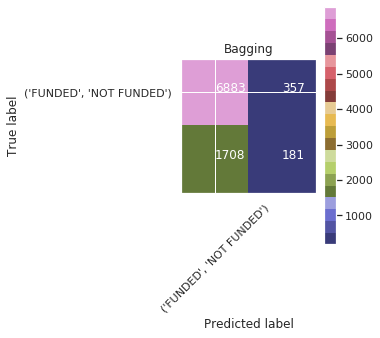

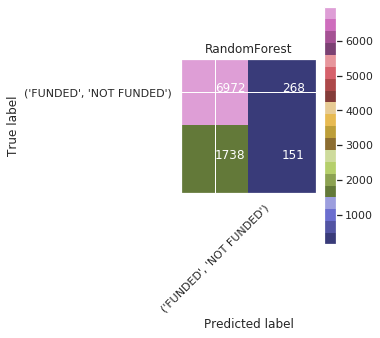

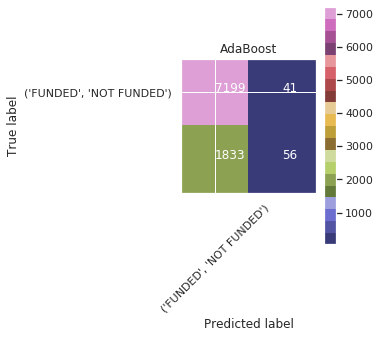

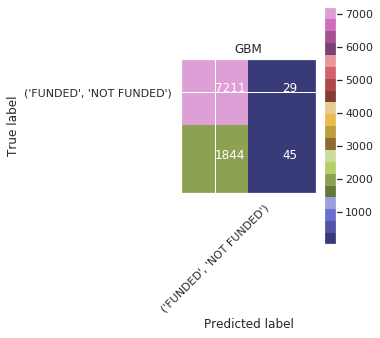

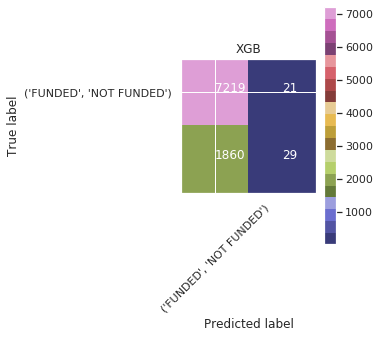

In [53]:
# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('Bagging', BaggingClassifier(random_state=0)))
models.append(('RandomForest', RandomForestClassifier(random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=0)))
models.append(('GBM', GradientBoostingClassifier(random_state=0)))
models.append(('XGB', XGBClassifier(random_state=0)))
results_tr = []
results_v = []
results_t = []
names = []
score = []
skf = StratifiedKFold(n_splits=5)
for (name, model) in models:
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train, y_train)
    predictions_tr = my_model.predict(X_train) 
    predictions_v = my_model.predict(X_valid)
    predictions_t = my_model.predict(X_test)
    f1_train = f1_score(y_train, predictions_tr, average='macro') 
    f1_valid = f1_score(y_valid, predictions_v,average='macro') 
    f1_test = f1_score(y_test, predictions_t,average='macro') 
    results_tr.append(f1_train)
    results_v.append(f1_valid)
    results_t.append(f1_test)
    
    names.append(name)
    f_dict = {
        'model': name,
        'f1_train': f1_train,
        'f1_valid': f1_valid,
        'f1_test': f1_test
    }
    # Computing Confusion matrix for the above algorithm
    cnf_matrix = confusion_matrix(y_test, predictions_t)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[('FUNDED', 'NOT FUNDED')], title=""+str(name))
    score.append(f_dict)
plt.show()    
score = pd.DataFrame(score, columns = ['model','f1_train', 'f1_valid', 'f1_test'])

In [54]:
# Look at the F1 score for each model and for each data set
print(score)

                model  f1_train  f1_valid   f1_test
0  LogisticRegression  0.440914  0.440383  0.442299
1             Bagging  0.964457  0.513504  0.509358
2        RandomForest  0.963472  0.493900  0.502541
3            AdaBoost  0.468773  0.469078  0.470614
4                 GBM  0.475241  0.465166  0.465452
5                 XGB  0.464872  0.457870  0.457324


### ****Scaled Baseline Models****
Since values of the features are not uniform I've tried to scale them and see what happens. Results from boosting models are not changed despite the other models.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Confusion matrix, without normalization
[[7219   21]
 [1878   11]]
Confusion matrix, without normalization
[[6886  354]
 [1712  177]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Confusion matrix, without normalization
[[6976  264]
 [1740  149]]
Confusion matrix, without normalization
[[7199   41]
 [1833   56]]
Confusion matrix, without normalization
[[7211   29]
 [1844   45]]
Confusion matrix, without normalization
[[7219   21]
 [1860   29]]


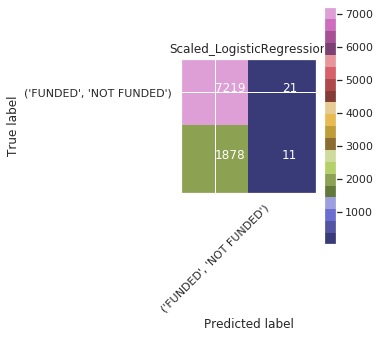

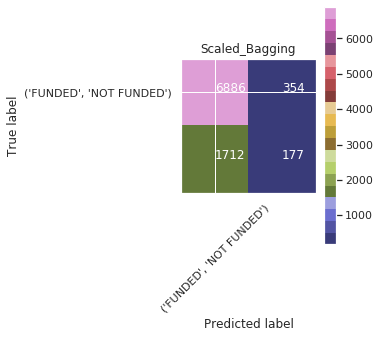

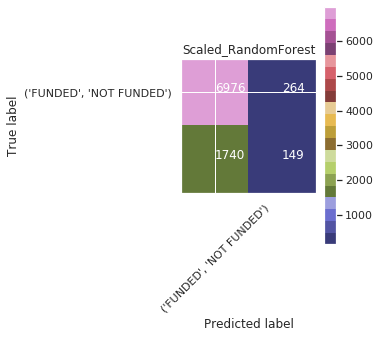

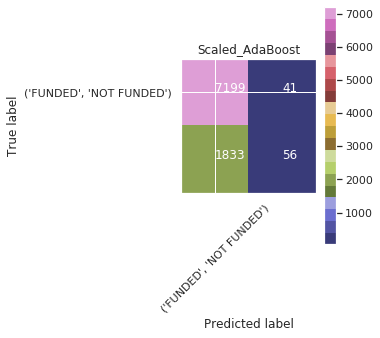

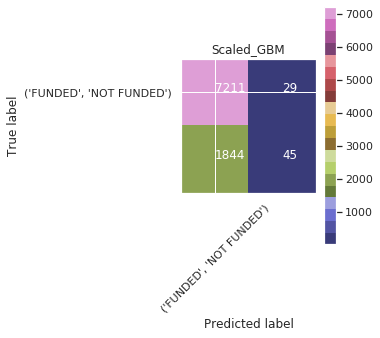

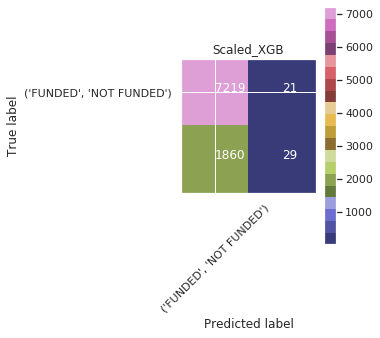

In [55]:
# Spot Check Algorithms with standardized dataset
pipelines = []
pipelines.append(('Scaled_LogisticRegression', Pipeline([('Scaler', StandardScaler()),('LogisticRegression', LogisticRegression(random_state=0))])))
pipelines.append(('Scaled_Bagging', Pipeline([('Scaler', StandardScaler()),('Bagging', BaggingClassifier(random_state=0))])))
pipelines.append(('Scaled_RandomForest', Pipeline([('Scaler', StandardScaler()),('RandomForest', RandomForestClassifier(random_state=0))])))
pipelines.append(('Scaled_AdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostClassifier(random_state=0))])))
pipelines.append(('Scaled_GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier(random_state=0))])))
pipelines.append(('Scaled_XGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier(random_state=0))])))
results_tr = []
results_v = []
results_t = []
names = []
score_sd = []
skf = StratifiedKFold(n_splits=5)
for (name, model) in pipelines:
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train, y_train)
    predictions_tr = my_model.predict(X_train) 
    predictions_v = my_model.predict(X_valid)
    predictions_t = my_model.predict(X_test)
    f1_train = f1_score(y_train, predictions_tr, average='macro') 
    f1_valid = f1_score(y_valid, predictions_v,average='macro') 
    f1_test = f1_score(y_test, predictions_t,average='macro')
    results_tr.append(f1_train)
    results_v.append(f1_valid)
    results_t.append(f1_test)
    names.append(name)
    f_dict = {
        'model': name,
        'f1_train': f1_train,
        'f1_valid': f1_valid,
        'f1_test': f1_test
    }
    # Computing Confusion matrix for the above algorithm
    cnf_matrix = confusion_matrix(y_test, predictions_t)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[('FUNDED','NOT FUNDED')], title=""+str(name))
    score_sd.append(f_dict)
plt.show()   
score_sd = pd.DataFrame(score_sd, columns = ['model','f1_train', 'f1_valid','f1_test'])

In [56]:
# Look at the F1 score for each model and for each data set
print(score_sd)

                       model  f1_train  f1_valid   f1_test
0  Scaled_LogisticRegression  0.447316  0.443080  0.447607
1             Scaled_Bagging  0.964513  0.511402  0.507918
2        Scaled_RandomForest  0.963579  0.495121  0.501929
3            Scaled_AdaBoost  0.468773  0.469078  0.470614
4                 Scaled_GBM  0.475241  0.465166  0.465452
5                 Scaled_XGB  0.464872  0.457870  0.457324


### ****Features Importance****
Not only the best model is relevant, but also I need to understand which features are relevant for the performance of the model and to understand how I can improve feature engineering. For this purpose I've extracted the top relevant features for some baseline models and I've applied the permutation importance. It works in this way: after a fitted model, it shuffle each column per time and it looks how the prediction change, in this way it orders features by importance. 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'RandomForest')

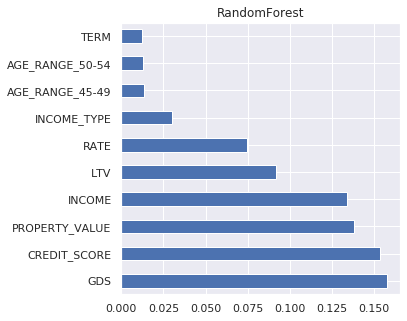

In [57]:
# Top relevant features
model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')).set_title("RandomForest")

In [58]:
# Permutation importance
perm = PermutationImportance(model, random_state=0).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.1210 ± 0.0034,PROPERTY_VALUE
0.1147 ± 0.0019,LTV
0.1126 ± 0.0023,INCOME
0.1026 ± 0.0028,CREDIT_SCORE
0.0991 ± 0.0023,RATE
0.0904 ± 0.0011,GDS
0.0576 ± 0.0019,MORTGAGE_PURPOSE_Refinance
0.0562 ± 0.0012,INCOME_TYPE
0.0457 ± 0.0009,MORTGAGE_PURPOSE_Purchase
0.0394 ± 0.0030,TERM


Text(0.5, 1.0, 'AdaBoost')

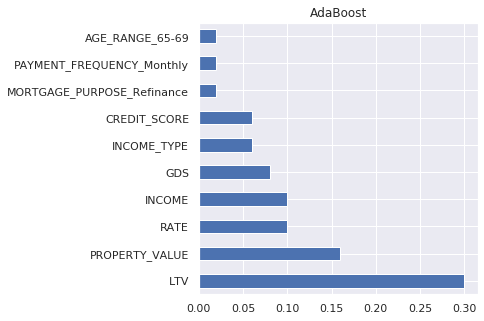

In [59]:
# Top relevant features
model = AdaBoostClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')).set_title("AdaBoost")

In [60]:
# Permutation importance
perm = PermutationImportance(model, random_state=0).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.0011 ± 0.0013,CREDIT_SCORE
0.0011 ± 0.0008,GDS
0.0011 ± 0.0003,LTV
0.0006 ± 0.0006,PROPERTY_VALUE
0.0004 ± 0.0002,INCOME_TYPE
0.0003 ± 0.0010,MORTGAGE_PURPOSE_Refinance
0.0003 ± 0.0003,PAYMENT_FREQUENCY_Monthly
0.0002 ± 0.0001,AGE_RANGE_65-69
0.0001 ± 0.0001,AMORTIZATION
0.0000 ± 0.0005,RATE


Text(0.5, 1.0, 'GBM')

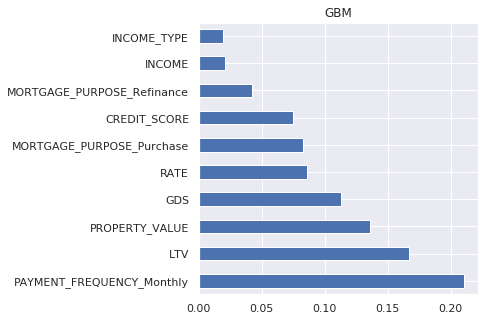

In [61]:
# Top relevant features
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')).set_title("GBM")

In [62]:
# Permutation importance
perm = PermutationImportance(model, random_state=0).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.0085 ± 0.0009,GDS
0.0042 ± 0.0008,LTV
0.0018 ± 0.0005,PROPERTY_VALUE
0.0013 ± 0.0008,CREDIT_SCORE
0.0009 ± 0.0005,RATE
0.0006 ± 0.0001,PAYMENT_FREQUENCY_Monthly
0.0004 ± 0.0003,MORTGAGE_PURPOSE_Purchase
0.0004 ± 0.0005,INCOME_TYPE
0.0003 ± 0.0000,PROPERTY_TYPE_Fourplex
0.0003 ± 0.0003,MORTGAGE_PURPOSE_Refinance


Text(0.5, 1.0, 'XGB')

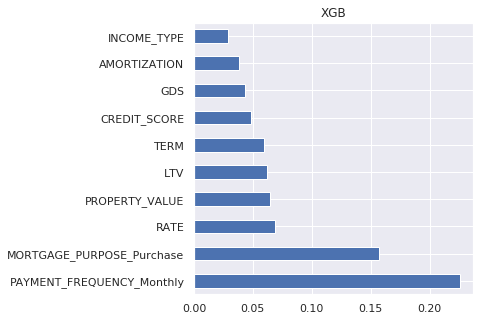

In [63]:
# Top relevant features
model = XGBClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')).set_title("XGB")

In [64]:
# Permutation importance
perm = PermutationImportance(model, random_state=0).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.0045 ± 0.0010,GDS
0.0027 ± 0.0006,LTV
0.0015 ± 0.0005,PROPERTY_VALUE
0.0010 ± 0.0004,CREDIT_SCORE
0.0005 ± 0.0001,PAYMENT_FREQUENCY_Monthly
0.0005 ± 0.0006,MORTGAGE_PURPOSE_Purchase
0.0004 ± 0.0004,RATE
0.0004 ± 0.0002,INCOME
0.0003 ± 0.0001,GENDER__0
0.0001 ± 0.0001,PROPERTY_TYPE_Single Detached


### ****Modeling Part II: handling unbalanced target variable****
A classical issue with classification task are unbalanced data, in this case the target variable. Moreover an high value of performance from accuracy could deceive because the classifier predicts always the majority class. So how to overcome this problem? Looking at the confusion matrix, at the recall, at the precision and the F1 score...it's not enough!!!. There are many solutions, but one of the best is to resample the dataset and in this case I've generated new samples in the the minority class (over-sampling).

### ****Pre-processing****

#### ****Over-sampling****

In [65]:
# Over-sampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_all, y)
print(sorted(Counter(y_resampled).items()))

[('FUNDED', 36023), ('NOT FUNDED', 36023)]


#### ****Split dataset****

In [0]:
# Break off validation and test set from training data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2,
                                                                random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2,
                                                                random_state=0)

### ****Baseline Models****
The over-sampling methodology has provided an improvement on the performance of the models in general.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Confusion matrix, without normalization
[[4691 2542]
 [3957 3220]]
Confusion matrix, without normalization
[[6114 1119]
 [ 597 6580]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Confusion matrix, without normalization
[[6232 1001]
 [ 626 6551]]
Confusion matrix, without normalization
[[4307 2926]
 [2485 4692]]
Confusion matrix, without normalization
[[4363 2870]
 [2362 4815]]
Confusion matrix, without normalization
[[4326 2907]
 [2374 4803]]


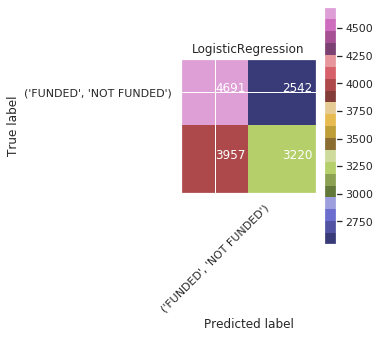

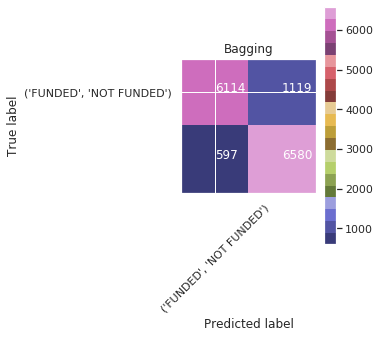

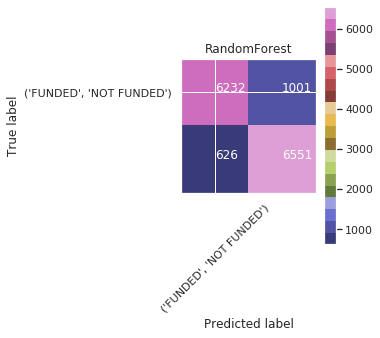

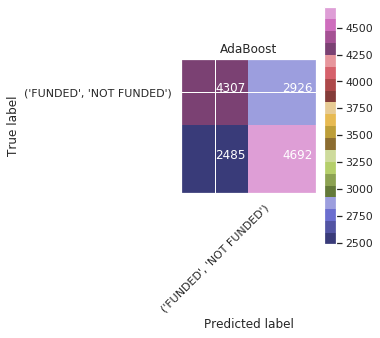

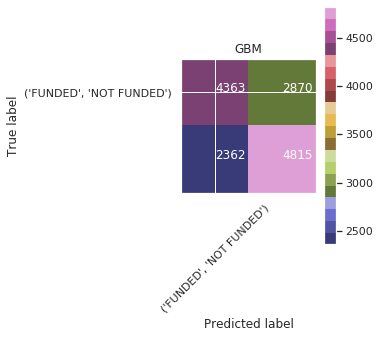

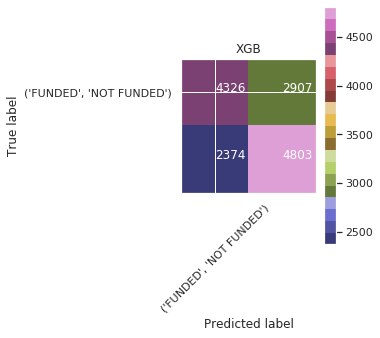

In [67]:
# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('Bagging', BaggingClassifier(random_state=0)))
models.append(('RandomForest', RandomForestClassifier(random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=0)))
models.append(('GBM', GradientBoostingClassifier(random_state=0)))
models.append(('XGB', XGBClassifier(random_state=0)))
results_tr = []
results_v = []
results_t = []
names = []
score = []
skf = StratifiedKFold(n_splits=5)
for (name, model) in models:
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train, y_train)
    predictions_tr = my_model.predict(X_train) 
    predictions_v = my_model.predict(X_valid)
    predictions_t = my_model.predict(X_test)
    f1_train = f1_score(y_train, predictions_tr,average='macro') 
    f1_valid = f1_score(y_valid, predictions_v,average='macro') 
    f1_test = f1_score(y_test, predictions_t,average='macro') 
    results_tr.append(f1_train)
    results_v.append(f1_valid)
    results_t.append(f1_test)
    
    names.append(name)
    f_dict = {
        'model': name,
        'f1_train': f1_train,
        'f1_valid': f1_valid,
        'f1_test': f1_test
    }
    # Computing Confusion matrix for the above algorithm
    cnf_matrix = confusion_matrix(y_test, predictions_t)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[('FUNDED', 'NOT FUNDED')], title=""+str(name))
    score.append(f_dict)
plt.show()    
score = pd.DataFrame(score, columns = ['model','f1_train', 'f1_valid', 'f1_test'])

In [68]:
# Look at the F1 score for each model and for each data set
print(score)

                model  f1_train  f1_valid   f1_test
0  LogisticRegression  0.548315  0.543433  0.544244
1             Bagging  0.995792  0.878107  0.880791
2        RandomForest  0.995792  0.883892  0.887037
3            AdaBoost  0.624594  0.622409  0.624229
4                 GBM  0.640549  0.630128  0.636561
5                 XGB  0.635831  0.629288  0.633116


### ****Scaled Baseline Models****
Also in this situation boosting models have the same results from the previous fitting. Scaled features have changed performance on logistic regression, bagging and random forest, slightly improvement for the last two.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Confusion matrix, without normalization
[[4106 3127]
 [2515 4662]]
Confusion matrix, without normalization
[[6107 1126]
 [ 600 6577]]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Confusion matrix, without normalization
[[6234  999]
 [ 631 6546]]
Confusion matrix, without normalization
[[4307 2926]
 [2485 4692]]
Confusion matrix, without normalization
[[4363 2870]
 [2362 4815]]
Confusion matrix, without normalization
[[4326 2907]
 [2374 4803]]


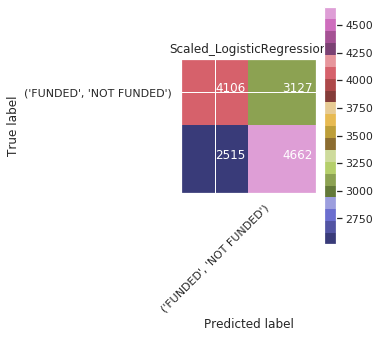

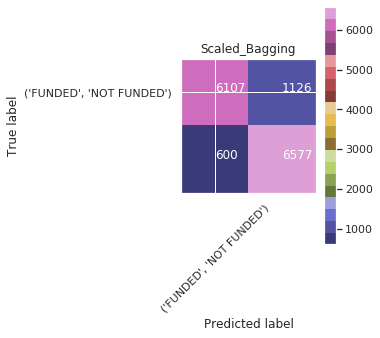

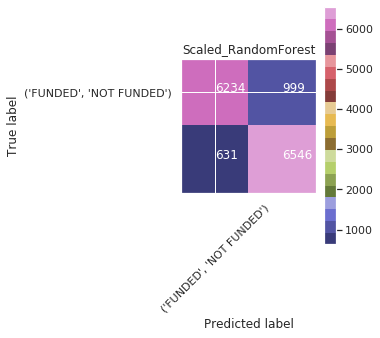

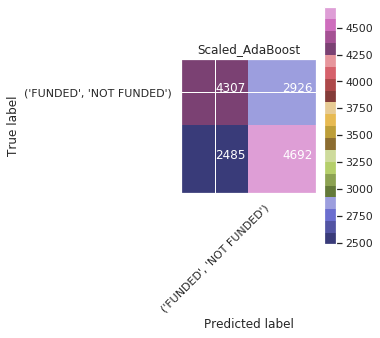

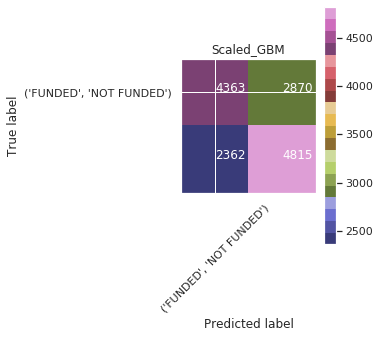

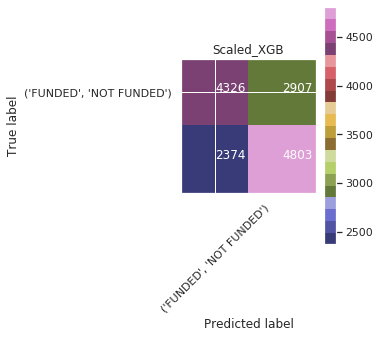

In [69]:
# Spot Check Algorithms with standardized dataset
pipelines = []
pipelines.append(('Scaled_LogisticRegression', Pipeline([('Scaler', StandardScaler()),('LogisticRegression', LogisticRegression(random_state=0))])))
pipelines.append(('Scaled_Bagging', Pipeline([('Scaler', StandardScaler()),('Bagging', BaggingClassifier(random_state=0))])))
pipelines.append(('Scaled_RandomForest', Pipeline([('Scaler', StandardScaler()),('RandomForest', RandomForestClassifier(random_state=0))])))
pipelines.append(('Scaled_AdaBoost', Pipeline([('Scaler', StandardScaler()),('AdaBoost', AdaBoostClassifier(random_state=0))])))
pipelines.append(('Scaled_GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier(random_state=0))])))
pipelines.append(('Scaled_XGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBClassifier(random_state=0))])))
results_tr = []
results_v = []
results_t = []
names = []
score_sd = []
skf = StratifiedKFold(n_splits=5)
for (name, model) in pipelines:
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train, y_train)
    predictions_tr = my_model.predict(X_train) 
    predictions_v = my_model.predict(X_valid)
    predictions_t = my_model.predict(X_test)
    f1_train = f1_score(y_train, predictions_tr,average='macro') 
    f1_valid = f1_score(y_valid, predictions_v,average='macro') 
    f1_test = f1_score(y_test, predictions_t,average='macro')
    results_tr.append(f1_train)
    results_v.append(f1_valid)
    results_t.append(f1_test)
    names.append(name)
    f_dict = {
        'model': name,
        'f1_train': f1_train,
        'f1_valid': f1_valid,
        'f1_test': f1_test
    }
    # Computing Confusion matrix for the above algorithm
    cnf_matrix = confusion_matrix(y_test, predictions_t)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[('FUNDED','NOT FUNDED')], title=""+str(name))
    score_sd.append(f_dict)
plt.show()   
score_sd = pd.DataFrame(score_sd, columns = ['model','f1_train', 'f1_valid','f1_test'])

In [70]:
# Look at the F1 score for each model and for each data set
print(score_sd)

                       model  f1_train  f1_valid   f1_test
0  Scaled_LogisticRegression  0.607788  0.603199  0.607883
1             Scaled_Bagging  0.995749  0.877932  0.880095
2        Scaled_RandomForest  0.995792  0.883720  0.886831
3            Scaled_AdaBoost  0.624594  0.622409  0.624229
4                 Scaled_GBM  0.640549  0.630128  0.636561
5                 Scaled_XGB  0.635831  0.629288  0.633116


#### ****Conclusions****
With this exploration step I've overcome the usual explorative data analysis: preparing categorical features as input for machine learning models, I've handled outliers, I've selected the most linked features with the outcome variable and I've explored several models with the opportunity to choice the best model and the best features for each one. Over-sampling methodology has afforded to overcome the issue with the unbalanced target variable; looking at the results, bagging and random forest models appears the best choice for this data set.  

### *References* 
-[An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/)

-[Guide to Data Exploration](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)


-[Statistics for machine learning](https://machinelearningmastery.com/statistics_for_machine_learning/) 


-[Machine learning with python](https://machinelearningmastery.com/machine-learning-with-python/)

-[Outliers detection](https://www.r-bloggers.com/outlier-detection-and-treatment-with-r/)

